# Heart Disease Data Set 


<b>1.  (age) :</b> (in years)<br>
<b>2.  (sex) :</b> (1 = male; 0 = female)<br> 
<b>3.  (cp)  :</b>chest pain type<br>
-- Value 1: typical angina<br>
-- Value 2: atypical angina<br>
-- Value 3: non-anginal pain<br>
-- Value 4: asymptomatic <br>
<b>4.  (trestbps) :</b> resting blood pressure (in mm Hg on admission to the hospital) <br>
<b>5.  (chol) :</b> serum cholestoral in mg/dl <br>
<b>6.  (fbs) :</b> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
<b>7.  (restecg) :</b> resting electrocardiographic resultss<br>
-- Value 0: normal<br>
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria <br>
<b>8.  (thalach)</b>  maximum heart rate achieved <br>
<b>9.  (exang)</b>  exercise induced angina (1 = yes; 0 = no) <br>
<b>10. (oldpeak)</b>  ST depression induced by exercise relative to rest <br>
<b>11. (slope)</b>  the slope of the peak exercise ST segment<br>
-- Value 1: upsloping<br>
-- Value 2: flat<br>
-- Value 3: downsloping <br>
<b>12. (ca)</b> number of major vessels (0-3) colored by flourosopy <br>
<b>13. (thal)</b>  3 = normal; 6 = fixed defect; 7 = reversable defect (not the same values in dataset) <br>
<b>14. (num) (the predicted attribute) </b>  diagnosis of heart disease (angiographic disease status)<br>
-- Value 0: < 50% diameter narrowing<br>
-- Value 1: > 50% diameter narrowing 

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv("heart.csv")

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [98]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


age          77.0
sex           1.0
cp            3.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64

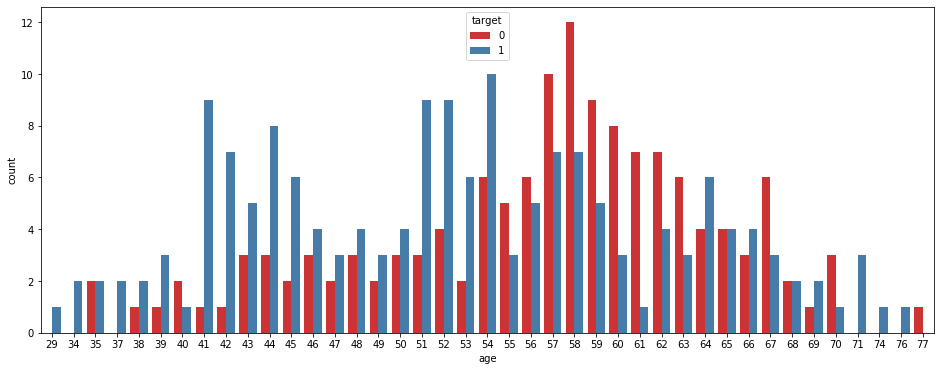

In [97]:
plt.figure(figsize=(16,6))
sns.countplot(df["age"],hue=df["target"],palette='Set1')

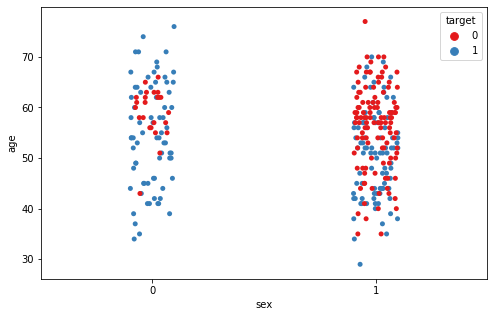

In [162]:
plt.figure(figsize=(8,5))
sns.stripplot(x="sex", y="age", data=df,jitter=True,hue='target',palette='Set1')

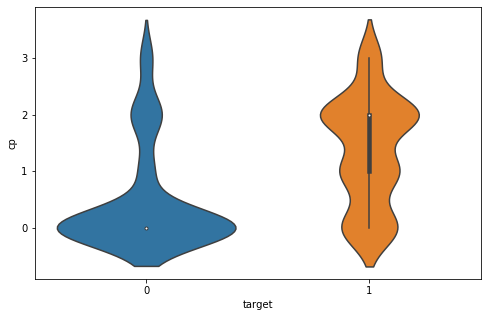

In [163]:
plt.figure(figsize=(8,5))
sns.violinplot(x='target',y='cp',data=df)

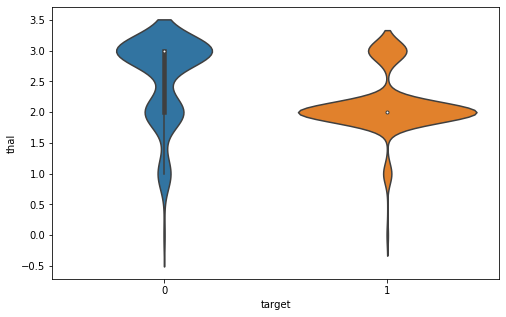

In [164]:
plt.figure(figsize=(8,5))
sns.violinplot(x='target',y='thal',data=df)

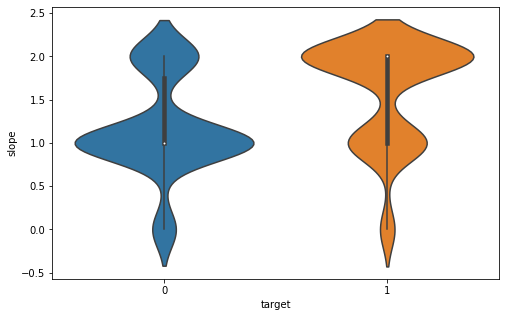

In [165]:
plt.figure(figsize=(8,5))
sns.violinplot(y='slope',x='target',data=df)

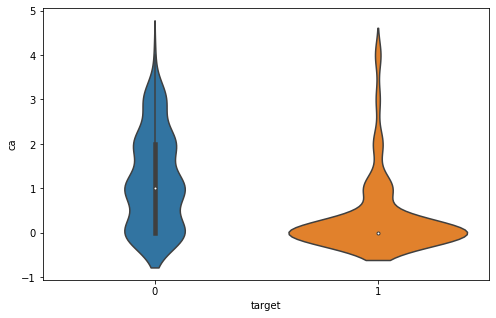

In [166]:
plt.figure(figsize=(8,5))
sns.violinplot(y='ca',x='target',data=df)

In [170]:
df_correlation = df.corr()
df_correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


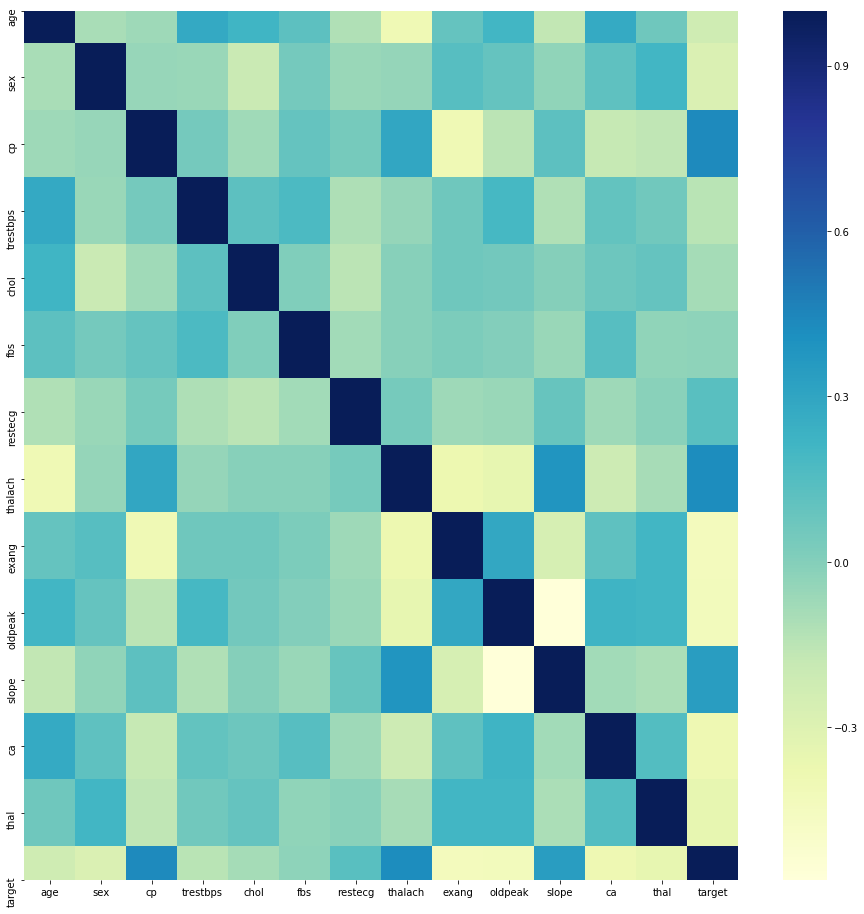

In [168]:
plt.figure(figsize=(16,16))
sns.heatmap(df_correlation,cmap="YlGnBu")

<Figure size 1152x1152 with 0 Axes>

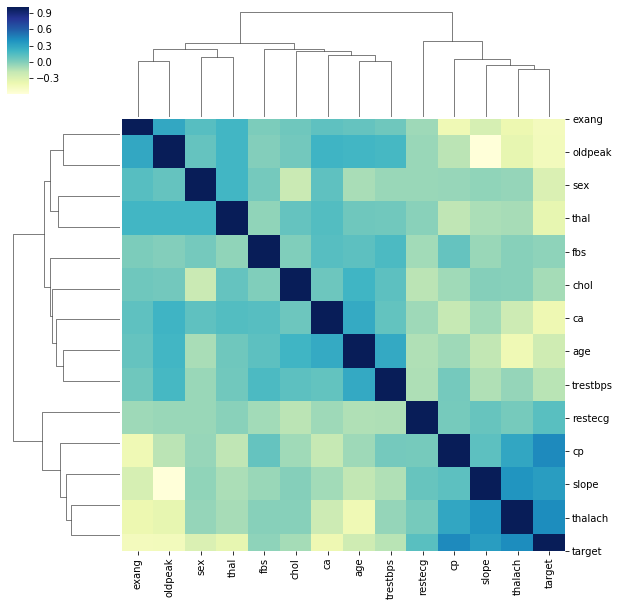

In [169]:
plt.figure(figsize=(16,16))
sns.clustermap(df_correlation,cmap="YlGnBu")